# 安全驾驶员预测 Porto Seguro’s Safe Driver Prediction  
https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

这是Kaggle平台上2017年9月30日开启的比赛，发起者是巴西最大的车辆及住房保险公司之一——Porto Seguro。比赛要求参赛者根据举办方所提供的保单持有人数据集，建立模型，预测保单人下一年索赔的概率，从而节省成本。为了保护隐私，数据特征都被处理成没有实际含义的名字，参赛者无法根据过去经验或行业知识对数据进行处理。



### 目录<a class ='anchor' id='table'></a>
1. [项目提案&数据梳理](#1)
    - 1.1 [项目提案](#1.1)
    - 1.2 [数据梳理](#1.2)
2. [元数据管理&基本数据分析](#2)
    - 2.1 [元数据](#2.1)
    - 2.2 [元数据描述性分析](#2.2) 
        - 2.2.1 [连续变量](#2.2.1)
        - 2.2.2 [顺序变量](#2.2.2)
        - 2.2.3 [二元变量](#2.2.3)
        - 2.2.4 [分类变量](#2.2.4)
    - 2.3 [相关性分析](#2.4)
    - 2.4 [数据不平衡：欠采样](#2.5)
    - 2.5 [缺失值分析和处理](#2.6)
3. [探索性分析](#3) 
4. [特征工程](#4)
5. [特征选择](#5)
6. [数据建模](#6)

## 1. 项目提案&数据梳理 <a class='anchor' id = '1'></a>
### 1.1 项目提案<a class='anchor' id = '1.1'></a>
[返回目录](#table)

通过查阅2017年相关的文章和报告，用PEST法分析可以得出当时的项目背景。  

#### Polics 政治
- 2017年4月，巴西政府发布了2018年起实施的新汽车政策《Rota 2030》，旨在完善投资环境和提高国内汽车行业竞争力。[来源](https://www.marklines.com/cn/report_all/rep1628_201708#report_area_4)
- 巴西法律要求所有司机都要有汽车保险，至少包括第三方责任保险，即免受第三方死亡或身体伤害的潜在责任。[来源](https://calculator8.com/br/car-insurance/#:~:text=Car%20insurance%2C%20which%20comes%20under%20vehicle%20insurance%20policy%2C,to%20accident%2C%20theft%20or%20loss%20of%20the%20car.)
    - 车险种类包括：
        - *第三方责任保险*：巴西法律规定每个人都必须购买此保单。它提供了对被保险汽车对第三方和财产造成的任何损害所引起的责任的保障。
        - *共同乘客保护范围*：一些保险提供商为共同乘客提供人身事故保险。
        - *个人风险保障*：保单通常只为车主提供保障。
        - *综合保单*：这是一项全包计划，为与汽车、第一方、同乘人员和第三方相关的所有风险提供保障。它还涵盖所有自然灾害或人为灾难，包括地震、罢工和骚乱。
    - 其中，综合保单投保最多，2018年占据了接近70%的投保额；其次是第三方责任保险，2018年占据了22%。[来源](https://www.casact.org/sites/default/files/presentation/spring_2019_presentations_c-7_ortega.pdf)
    
#### Economics 经济
- 2015-2016年，巴西受到经济衰退的影响，呈现连续两年负增长。2017年，巴西经济呈缓慢复苏态势，新车销售和生产都有所增长。[来源](https://www.marklines.com/cn/report_all/rep1628_201708#report_area_2)
- 2017年，车险业务渗透率几乎保持稳定，但仍需扩大新客户的保险渠道。[来源](https://seekingalpha.com/article/4144606-porto-seguro-sa-ord-2017-q4-results-earnings-call-slides)
- 车险的行业集中度一直都比较高，top5的公司占了60%的premium，其中包括Porto Seguro。 [来源](https://www.casact.org/sites/default/files/presentation/spring_2019_presentations_c-7_ortega.pdf)
- 2017年第一季度，各大保险公司竞争激烈。第二季度竞争减少，但是呈现增长的公司同时呈现更高的花费。[来源](https://seekingalpha.com/article/4144606-porto-seguro-sa-ord-2017-q4-results-earnings-call-slides)

#### Society 社会
- 由于车险承担能力不足和政府执法不力的问题，许多汽车还没有购买保险。2018年仅有23%的的汽车涵盖保险。[来源](https://www.expatbriefing.com/country/brazil/financial/insurance-for-expats-in-brazil.html)
- 车险每年所需费用通常在汽车总价格的3%到10%之间。车险根据车主的年龄、汽车的使用方式、驾驶人数以及汽车本身的不同而有很大差异。[来源](https://thebrazilbusiness.com/article/costs-of-owning-a-car-in-brazil)
- 受经济的影响，巴西有一些州属犯罪率上升，保险公司不得不考虑这些潜在的风险。
- 巴西互联网和智能手机普及程度较高，超过2/3的巴西人接触到智能手机和网络，他们每天花费超过9个小时在网络上。但不同地区、社会地位和年龄层的网速和普及程度有差异。 [来源](https://www.casact.org/sites/default/files/presentation/spring_2019_presentations_c-7_ortega.pdf)

#### Technology 科技
- 当时各个保险公司在研究保险产品电子化，希望通过app向人们投放金融及保险产品，形成对人们穿衣住行的闭环。

通过对项目背景的描述，可以得出但不仅限于以下项目发起的目的，即项目的商业意义。
- **在保险公司层面**：2017年，巴西经济复苏，新车销售额增加，购买车险的潜在客户增加。但是第一季度车险行业竞争激烈，第二季度得到增长的公司无不需要花费更高的费用。而持续增加市场渗透率同时控制成本的关键，在于一个更为精确的模型，能够预估一个驾驶员需要理赔的概率，从而给出更加合理的定价。
- **在消费者层面**：目前车险行业的定价对于大部分消费者来说无法承担。对于好的、熟练的司机来说，他们不经常发生交通事故，过高的保险费会流失这部分用户；而对于新手、易出现事故的司机来说，过低的保险费会使保险公司的成本增加。一个更为精确的模型可以帮助司机减少不必要的保险支出，提升司机的理性投保意愿
- **在发展层面**：一个更为精确的模型可以帮助公司缩小对客户特征的调研范围，极大节省研究成本，扩大精英特征的研究投入，对新用户索赔情况快速响应等等。

### 1.2 数据梳理<a class='anchor' id = '1.2'></a>
[返回目录](#table)

In [1]:
#!pip install missingno
####数据操作
import pandas as pd
import numpy as np
import re

#### 可视化
import matplotlib.pyplot as plt
import seaborn as sns

#### 缺失值
import missingno as msno  
from sklearn.impute import SimpleImputer 
from sklearn import preprocessing

#### 统计
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

#### 格式设置
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
#### 读取数据
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
#### 检查数据尺寸
print('Training data shape: {}'.format(train.shape))
print('Training data shape: {}'.format(test.shape))

Training data shape: (595212, 59)
Training data shape: (892816, 58)


In [4]:
#### 检查数据类型
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

测试集一共包含595212行、59列。测试集一共包含892816行、58列。target列表示是否为该保单持有人提出索赔，测试集少的一列就是该列。特征的命名规则如下：

* 属于相似分类的特征在特征名称中被标记相同的后缀，包括ind、reg、car、calc，可以猜测分别为与个人、地区、汽车以及其他通过计算或估算得到的特征
* 二元特征的命名包含后缀 bin（binary） 
* 分类特征的命名包含后缀 cat（nominal）
* 没有这些后缀的特征是连续的（interval）或有序的（ordinal）

In [5]:
#### 定义函数查看前5和后5的数据
def check_data(dataset):
    return pd.concat([dataset.head(5), dataset.tail(5)],axis=0)

In [6]:
check_data(train)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


## 2. 元数据管理&基本数据分析 <a class='anchor' id = '2'></a>
### 2.1 元数据<a class='anchor' id = '2.1'></a>
[返回目录](#table)

元数据即数据的数据，在这里选取了数据角色、变量类型、数据类型、是否保留、唯一值数量、缺失值数量六个维度对数据进行描述。每一列的值主要包括：
- 数据角色：目标标签（是否发起索赔）、序列号（不属于特征）、特征
- 变量类型：binary（二元）、nominal（分类）、interval（连续）、ordinal（顺序）
- 数据类型：int、float
- 保留与否：True、False
- 唯一值数量：除去缺失值（-1）的unique值
- 缺失值数量：-1的个数（-1的比例）

In [7]:
#### 构建元数据结构表
meta=[]
for name in train.columns:
    #### 定义数据角色
    if name == 'target':
        role = '目标标签（是否发起索赔）'
    elif name == 'id':
        role = '序列号（不属于特征）'
    else:
        role = '特征'
         
    #### 定义变量类型
    if 'bin' in name or name == 'target':
        level = 'binary'
    elif 'cat' in name or name == 'id':
        level = 'nominal'
    elif train[name].dtype == float:
        level = 'interval'
    elif train[name].dtype == int:
        level = 'ordinal'
    
    #### 定义数据类型
    dtype = train[name].dtype
        
    #### 定义保留与否
    keep = True
    if name == 'id':
        keep = False

    #### 定义唯一值数量
    if name == 'id' or level == 'interval':
        only = '不统计'
    else:
        only = train[name].replace({-1:np.nan}).nunique()
    
    #### 定义缺失值
    miss_count = sum(train[name] == -1)
    miss = f'{miss_count}({round(miss_count*100/len(train),2)}%)'
    
    
    #### 创造字典，保存当前变量的数据
    f_dict = {
        '变量名称': name,
        '数据角色': role,
        '变量类型': level,
        '数据类型': dtype,
        '是否保留': keep,
        '唯一值数量': only,
        '缺失值数量': miss
    }
    
    #### 把当前变量的数据加到总体里
    meta.append(f_dict)
    
meta = pd.DataFrame(meta, columns=['变量名称', '数据角色', '变量类型', '数据类型', '是否保留', '唯一值数量', '缺失值数量'])
meta.set_index('变量名称', inplace=True)
meta

,数据角色,变量类型,数据类型,是否保留,唯一值数量,缺失值数量
变量名称,,,,,,
id,序列号（不属于特征）,nominal,int64,False,不统计,0(0.0%)
target,目标标签（是否发起索赔）,binary,int64,True,2,0(0.0%)
ps_ind_01,特征,ordinal,int64,True,8,0(0.0%)
ps_ind_02_cat,特征,nominal,int64,True,4,216(0.04%)
ps_ind_03,特征,ordinal,int64,True,12,0(0.0%)
ps_ind_04_cat,特征,nominal,int64,True,2,83(0.01%)
ps_ind_05_cat,特征,nominal,int64,True,7,5809(0.98%)
ps_ind_06_bin,特征,binary,int64,True,2,0(0.0%)
ps_ind_07_bin,特征,binary,int64,True,2,0(0.0%)


In [8]:
#### 统计各个数据角色、变量类型各有多少个特征
meta[['数据角色', '变量类型']].value_counts().sort_index().reset_index(name='总数')

,数据角色,变量类型,总数
0,序列号（不属于特征）,nominal,1
1,特征,binary,17
2,特征,interval,10
3,特征,nominal,14
4,特征,ordinal,16
5,目标标签（是否发起索赔）,binary,1


从上面两个表可以看出，
- 与个人相关的特征（ind后缀）有18个，大多数是二元变量，其余是顺序变量和分类变量
- 与地区相关的特征（reg后缀）有3个，都是连续变量
- 与车相关的特征（car后缀）有15个，大多数是分类变量，其余是连续变量和一个顺序变量
- 与计算相关的特征（calc后缀）有20个，大多数是顺序变量，其余是二元变量和连续变量
- 特征列以二元变量和顺序变量为主，目标列是二元变量
- ps_car_11_cat和ps_car_11出现了相同的编码，可能存在联系

### 2.2 元数据描述性分析<a class='anchor' id = '2.2'></a>

为了进一步了解不同变量类型的描述性统计特征（std，min，max等），使用describe()或者可视化查看分布情况。

#### 2.2.1 连续变量 <a class='anchor' id='2.2.1'>
[返回目录](#table)

In [9]:
#### 对连续变量（interval）做统计描述性分析
interval_col = meta[(meta['变量类型']=='interval') & (meta['是否保留'])].index
stat = train[interval_col].describe()
stat_nomiss = train[interval_col].replace({-1:np.nan}).describe()
stat_nomiss

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,487440.000000,595211.000000,595212.000000,552592.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.894047,0.379947,0.813265,0.374691,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.345413,0.058300,0.224588,0.045610,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,0.061237,0.100000,0.250619,0.109545,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.633443,0.316228,0.670867,0.350428,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.801561,0.374166,0.765811,0.373497,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.083974,0.400000,0.906190,0.398121,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [10]:
#### 含有缺失值的列
stat.loc['min', stat.loc['min',:]==-1].index

Index(['ps_reg_03', 'ps_car_12', 'ps_car_14'], dtype='object')

In [11]:
#### std最小/最大的列和数值
std_min_col = stat_nomiss.columns[stat_nomiss.loc['std',:].argmin()]
std_min = stat_nomiss.loc['min',std_min_col]
std_max_col = stat_nomiss.columns[stat_nomiss.loc['std',:].argmax()]
std_max = stat_nomiss.loc['max',std_max_col]
print(f'std最小的列是"{std_min_col}"，std值为{std_min}')
print(f'std最大的列是"{std_max_col}"，std值为{std_max}')

std最小的列是"ps_car_14"，std值为0.1095445115
std最大的列是"ps_car_15"，std值为3.7416573868


In [12]:
#### max最小/大的列
max_max_col = stat_nomiss.columns[stat_nomiss.loc['max',:].argmax()]
max_max = stat_nomiss.loc['max',max_max_col]
max_min_col = stat_nomiss.columns[stat_nomiss.loc['max',:].argmin()]
max_min = stat_nomiss.loc['max',max_min_col]
print(f'max最大的列是{max_max_col}, max值为{max_max}')
print(f'max最小的列是{max_min_col}, max值为{max_min}')

max最大的列是ps_reg_03, max值为4.0379450219
max最小的列是ps_car_14, max值为0.6363961031


从上面表格可以看出连续变量列：
- ps_reg_03、ps_car_12和ps_car_14列有缺失值
- 去掉缺失值后，各列的标准差和最大值差距不是很大，可能已经被transform过了
    - ps_car_14的std和max都是最小的，说明这一列的数据分布比较集中，且数值不大
    - ps_car_15的std最大，说明这一列的数据分布相对分散
    - ps_reg_03的max最大，有可能存在偏差值
- calc三列的数据分布很相似，包括min、max、四分位数、std，可能被发布者归一化或者transform处理了，也有可能是比率型数据

#### 2.2.2 顺序变量<a class='anchor' id='2.2.2'>
[返回目录](#table)

In [13]:
#### 对顺序变量（ordinal）做统计描述性分析
#### 收集顺序变量列
ordinal_col = meta[(meta['变量类型']=='ordinal') & (meta['是否保留'])].index
train[ordinal_col].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


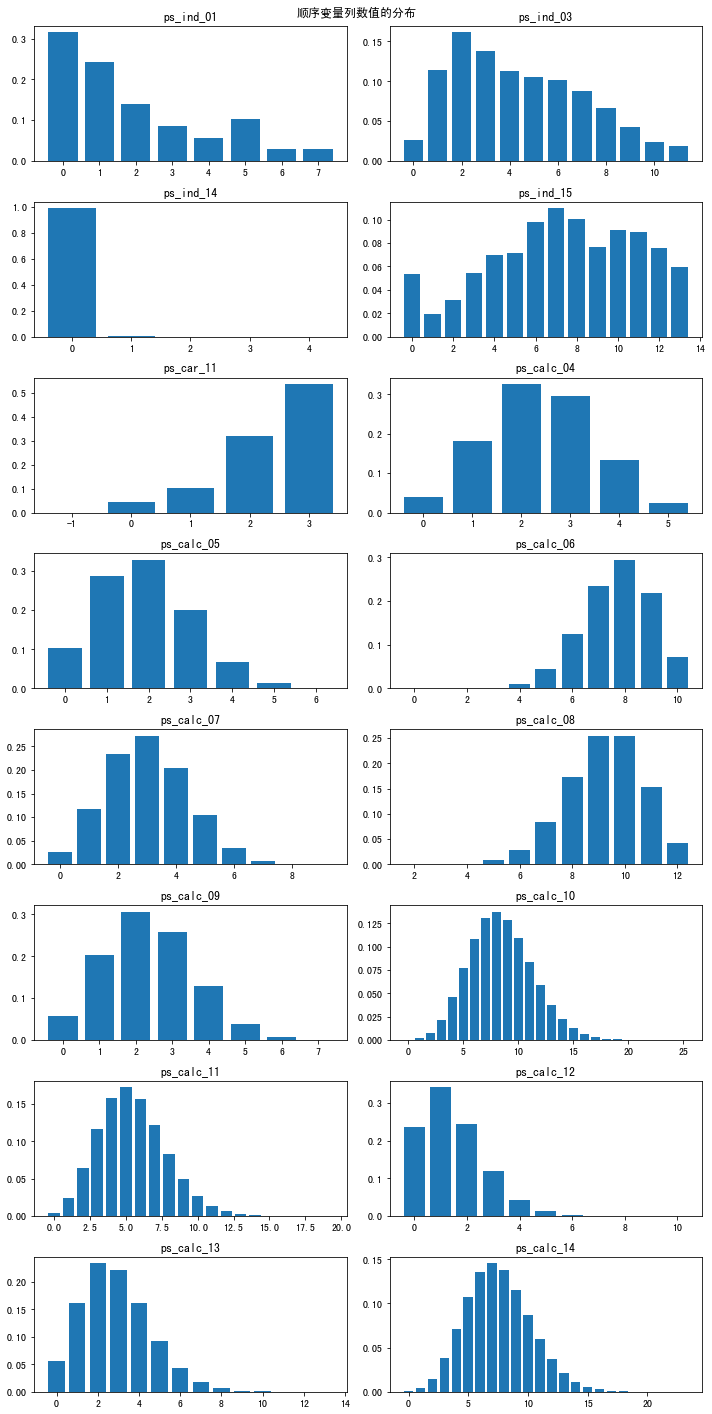

In [14]:
#### 可视化这些列的数值分布
fig, axs = plt.subplots(8,2,figsize=(10,20))       
k = j = 0
for i in ordinal_col:
    ##### 画当前坐标图：x坐标按数值大小排序
    p_data = train[i].value_counts(normalize=True).sort_index()
    axs[k,j].bar(p_data.index, p_data.values, )
    axs[k,j].set_title(i)
    ##### 换坐标
    if j == 1:
        k += 1
        j = 0
    else:
        j += 1
plt.suptitle('顺序变量列数值的分布')
plt.tight_layout()
plt.show()

从上面表格可以看出顺序变量列：
- 只有ps_car_11有少量缺失值
- 与个人和车相关的列分布不平衡，呈现出左/右偏的分布；与计算相关的列大多呈正态分布
    - ps_ind_14的值几乎全是0
    - ps_car_11的值接近一半是3
- 但部分与计算相关的列设置的分类过多，分布呈现出长尾
    - ps_calc_10的值有25个类别
    - ps_calc_11、ps_calc_14的值有20个类别
- 列与列之间的数值差异比较大，需要考虑transform或归一化等处理方法

#### 2.2.3 二元变量<a class='anchor' id='2.2.3'>
[返回目录](#table)

In [15]:
#### 对二元变量（binary）做统计描述性分析
binary_col = meta[(meta['变量类型']== 'binary') & (meta['是否保留'])].index
train[binary_col].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 432x288 with 0 Axes>

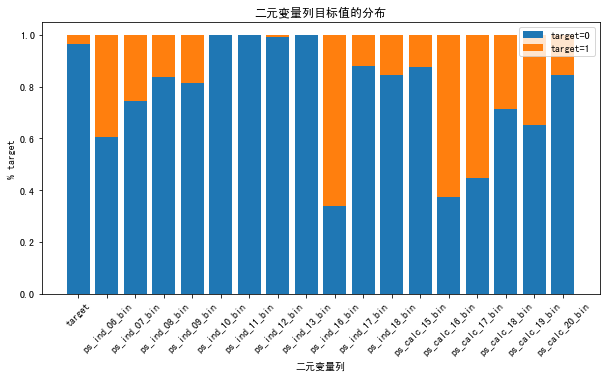

In [16]:
#### 可视化0和1在二元变量列的分布
#### 收集每列0的比例（target_0）和1的比例（target_1）
target_0 = []
for i in binary_col:
    per_0 = sum(train[i]==0)/len(train)
    target_0.append(per_0)
target_1 = list(map(lambda x: x[0]-x[1], zip([1]*len(target_0), target_0)))
####可视化
plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
bar1 = ax.bar(x = binary_col, height = target_0, label = 'target=0')
bar2 = ax.bar(x = binary_col, height = target_1, bottom = target_0, label = 'target=1')
ax.set_ylabel("% target")
ax.set_xlabel("二元变量列")
ax.set_title("二元变量列目标值的分布")
plt.xticks(rotation=45)
ax.legend()
plt.show()

从上面表格可以看出二元变量列：
- 没有缺失值
- 很多列的0-1分布非常不均衡
- target列只有3.6%的数据是1，大部分样本都是第二年没有提出索赔的司机

#### 2.2.4 分类变量 <a class='anchor' id='2.2.4'>
[返回目录](#table)

In [17]:
#### 对分类变量（norminal）做统计描述性分析
nominal_col = meta[(meta['变量类型']== 'nominal') & (meta['是否保留'])].index

In [18]:
meta.loc[nominal_col]

,数据角色,变量类型,数据类型,是否保留,唯一值数量,缺失值数量
变量名称,,,,,,
ps_ind_02_cat,特征,nominal,int64,True,4,216(0.04%)
ps_ind_04_cat,特征,nominal,int64,True,2,83(0.01%)
ps_ind_05_cat,特征,nominal,int64,True,7,5809(0.98%)
ps_car_01_cat,特征,nominal,int64,True,12,107(0.02%)
ps_car_02_cat,特征,nominal,int64,True,2,5(0.0%)
ps_car_03_cat,特征,nominal,int64,True,2,411231(69.09%)
ps_car_04_cat,特征,nominal,int64,True,10,0(0.0%)
ps_car_05_cat,特征,nominal,int64,True,2,266551(44.78%)
ps_car_06_cat,特征,nominal,int64,True,18,0(0.0%)


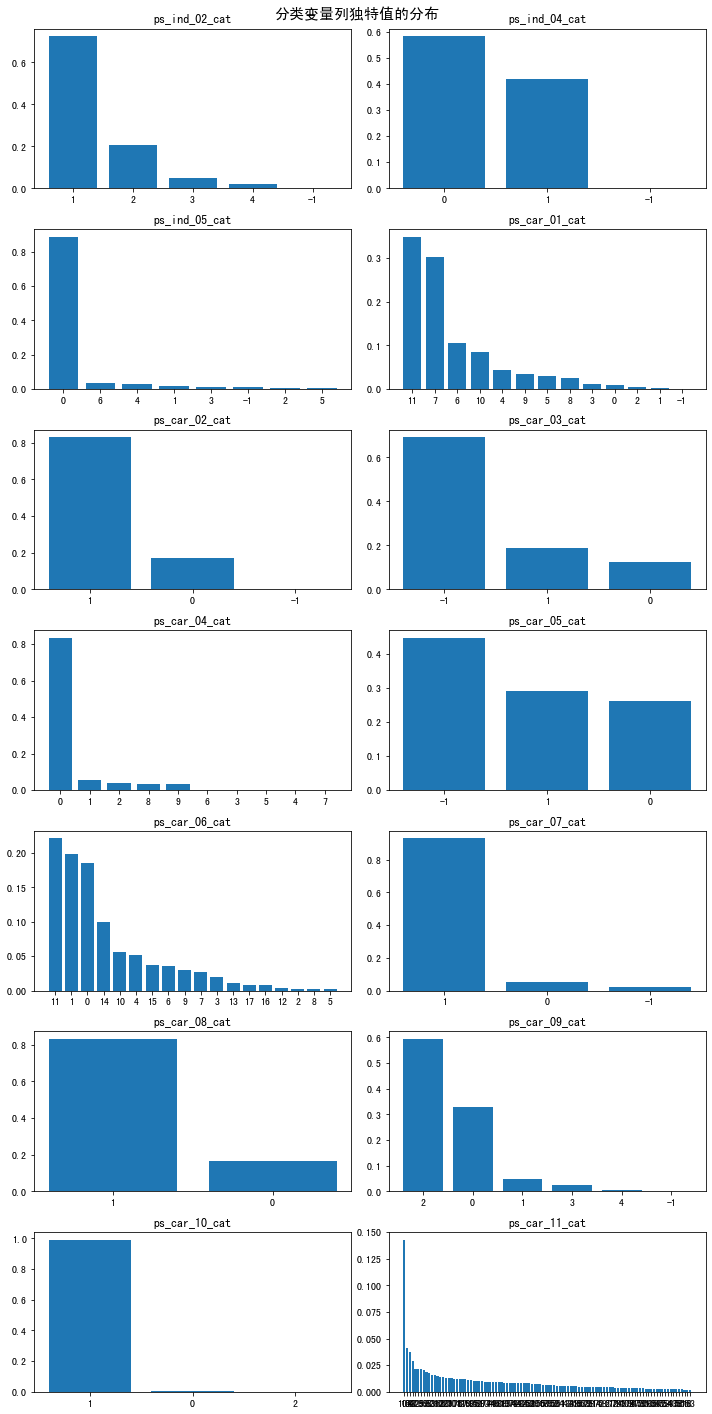

In [19]:
#### 可视化这些列的数值分布
fig, axs = plt.subplots(7,2,figsize=(10,20))       
k = j = 0
for i in nominal_col:
    ##### 画当前坐标图：x坐标按数值大小排序
    p_data = train[i].value_counts(normalize=True).sort_values(ascending=False)
    axs[k,j].bar(p_data.index.astype('str'), p_data.values)
    axs[k,j].set_title(i)
    ##### 换坐标
    if j == 1:
        k += 1
        j = 0
    else:
        j += 1
plt.suptitle('分类变量列独特值的分布', fontsize=15)
plt.tight_layout()
plt.show()

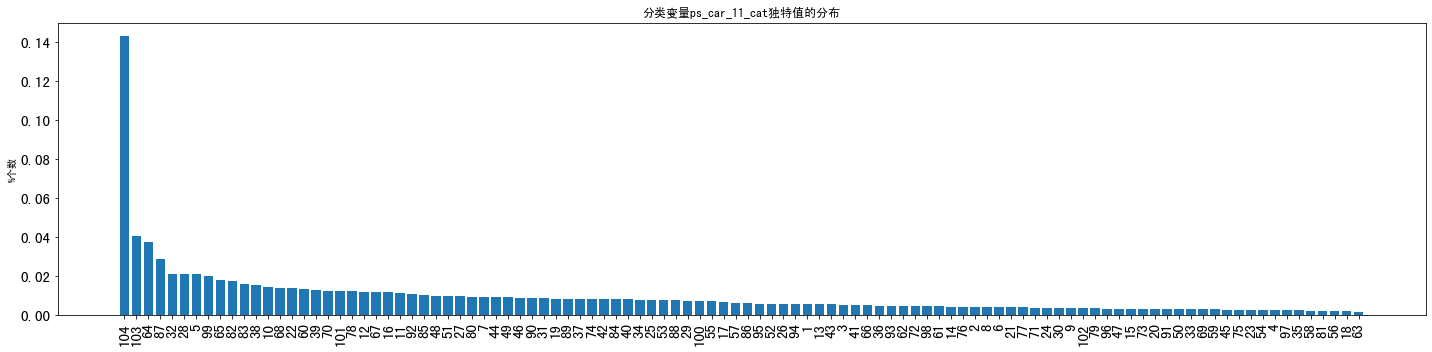

In [20]:
plt.figure(figsize=(20,5))
ps_car_11_cat_p = train['ps_car_11_cat'].value_counts(normalize=True).sort_values(ascending=False)
plt.bar(x = ps_car_11_cat_p.index.astype('str'),
        height = ps_car_11_cat_p.values)
plt.title(f'分类变量ps_car_11_cat独特值的分布')
plt.ylabel('%个数')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

从上面图表可以看出分类变量列：
- 大部分都含有缺失值，且部分列的缺失值接近甚至超过一半(ps_car_03_cat, ps_car_05_cat)
- 大部分列的独特值分布不平衡，即某一类独特值占比非常大，其余类占比非常小
- ps_car_08_cat只有两个独特值，却没有归类到二元变量
- ps_car_11_cat有104个类别，其中14%左右都是104类。在后续的encoding中，这列会有维度爆炸的问题

**总结**
1. 数据不平衡，特别是target列 - resampling
2. 部分列的缺失值过多 - 丢弃/填充值
3. 存在完全不相关的列 - 可以考虑特征增强

### 2.5 数据不平衡：欠采样<a class='anchor' id = '2.5'></a>
[返回目录](#table)

<img src="https://pic.imgdb.cn/item/621873142ab3f51d9152bcda.jpg">

由于这个样本量比较大，采取欠采样的方法。欠采样率的公式为

$$
undersampling~rate = \frac{(1-r)*{minority~size}}{r*majority~size}\\
where ~r = desired~proportion~rate
$$

欠采样率代表少数类在数据总体占比，即当欠采样率为0.1，多数类和少数类的数量占比应为9:1，少数类占了总体的10%

In [21]:
def undersampling(df, desired_prop_rate, plot = True):
    # 获取target=0和1的index
    idx_class_0 = df[df['target']==0].index
    idx_class_1 = df[df['target']==1].index

    # 获取target=0和1的个数
    count_class_0 = len(idx_class_0)  
    count_class_1 = len(idx_class_1)  

    # 根据上面的公式计算undersampling rate
    undersampling_rate = ((1 - desired_prop_rate) * count_class_1)/(desired_prop_rate * count_class_0)
    undersampled_majority_size = int(undersampling_rate * count_class_0)

    print(f"关于target=0的欠采样比率为:【{undersampling_rate}】")
    print(f"在欠采样之后，target=0的数量为：【{undersampled_majority_size}】")

    # 用shuffle函数对target=0的所有数据打乱抽样，seed=100,抽样数为刚刚计算的值
    undersampled_idx = shuffle(idx_class_0, random_state = 100, 
                               n_samples=undersampled_majority_size)

    # 把undersampling之后的idx和之前的target=1的idx合并，并在train里面根据idx把数据索引出来
    idx_total = list(undersampled_idx)+list(idx_class_1)

    df = df.loc[idx_total].reset_index(drop=True)

    # 如果plot参数设置为True，画出欠采样之后的target分布柱形图。
    if plot == True:
        import seaborn as sns
        sns.countplot(x='target', data=df)
        # print(df.target.value_counts()/df.shape[0])

    return df

关于target=0的欠采样比率为:【0.21434840173571998】
在欠采样之后，target=0的数量为：【122932】


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,744529,0,2,1,9,1,0,0,0,1,...,5,1,2,8,0,0,1,0,0,0
1,673907,0,1,1,2,1,0,0,1,0,...,6,4,4,9,1,1,1,1,1,0
2,730796,0,7,1,6,0,4,0,0,0,...,3,1,3,7,0,1,1,0,0,0
3,306142,0,1,1,3,0,0,1,0,0,...,5,0,2,9,0,0,1,0,0,0
4,1102701,0,6,2,7,1,0,0,1,0,...,6,0,2,9,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144621,1487473,1,5,1,7,0,3,0,0,1,...,10,1,5,7,0,1,1,0,0,0
144622,1487566,1,1,1,5,0,0,0,0,1,...,9,2,1,5,0,1,0,0,0,0
144623,1487716,1,0,1,6,1,0,0,1,0,...,3,2,1,6,0,1,1,0,0,0
144624,1487748,1,0,2,2,0,0,1,0,0,...,5,0,4,4,0,0,1,0,1,0


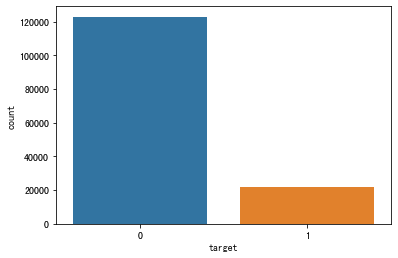

In [22]:
undersampling(df = train,desired_prop_rate = 0.15)

In [23]:
#### 把上面的df赋值给train_balanced，后面使用
train_balanced = undersampling(df = train,desired_prop_rate = 0.15, plot=False)

关于target=0的欠采样比率为:【0.21434840173571998】
在欠采样之后，target=0的数量为：【122932】


In [24]:
pre_ratio = train['target'].value_counts(normalize=True).to_dict()
aft_ratio = train_balanced['target'].value_counts(normalize=True).to_dict()
print(f'欠采样前比率：{pre_ratio}')
print(f'欠采样后比率：{aft_ratio}')

欠采样前比率：{0: 0.963552482140817, 1: 0.036447517859182946}
欠采样后比率：{0: 0.8499993085613928, 1: 0.15000069143860717}


### 2.5 缺失值分析和处理<a class='anchor' id = '2.5'></a>
#### 2.5.1 缺失值分析<a class='anchor' id = '2.5.1'></a>
[返回目录](#table)

In [25]:
#### 先copy一个train_balanced，方便重新查看原数据
train_balanced_update = train_balanced.copy()

In [26]:
#### 按缺失值排序
miss_summary = pd.DataFrame(
    data = [a for (a, b) in sorted(
        zip(meta.reset_index()[['变量名称', '变量类型', '缺失值数量']].values,
            meta['缺失值数量'].apply(lambda x: int(re.findall('(\d+)\\(', x)[0]))
           ), 
        key=lambda x:x[1], 
        reverse=True
    ) 
            if b>0],
    columns = ['变量名称', '变量类型', '缺失值数量'])
miss_summary

,变量名称,变量类型,缺失值数量
0,ps_car_03_cat,nominal,411231(69.09%)
1,ps_car_05_cat,nominal,266551(44.78%)
2,ps_reg_03,interval,107772(18.11%)
3,ps_car_14,interval,42620(7.16%)
4,ps_car_07_cat,nominal,11489(1.93%)
5,ps_ind_05_cat,nominal,5809(0.98%)
6,ps_car_09_cat,nominal,569(0.1%)
7,ps_ind_02_cat,nominal,216(0.04%)
8,ps_car_01_cat,nominal,107(0.02%)
9,ps_ind_04_cat,nominal,83(0.01%)


<AxesSubplot:>

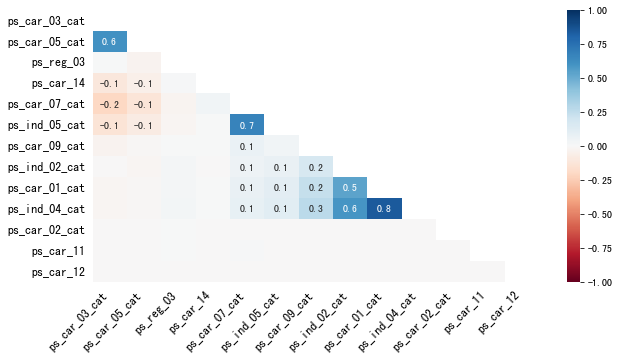

In [27]:
miss_col = miss_summary['变量名称'].tolist()
msno.heatmap(df=train[miss_col].replace({-1:np.nan}), figsize=(10,5), fontsize=12, )

从上图可以看出：
- 缺失值主要在分类变量列（nominal），缺失相关主要在车（car后缀）和人（ind后缀）相关的列之间，其中：
    - 缺失值最多的两列是ps_car_03_cat和ps_car_05_cat，所以它们之间的缺失相关性较强(0.6)
    - ps_reg_03的缺失值几乎达到20%，但是与其他列的缺失情况没有什么联系
    - ps_ind_04_cat和ps_car_01_cat(0.8)
    - ps_ind_05_cat和ps_car_07_cat(0.7)
    - ps_ind_04_cat和ps_ind_02_cat(0.6)

#### 2.5.2 相关性分析<a class='anchor' id = '2.5.2'></a>
[返回目录](#table)

Text(0.5, 1.0, 'Pearson correlation')

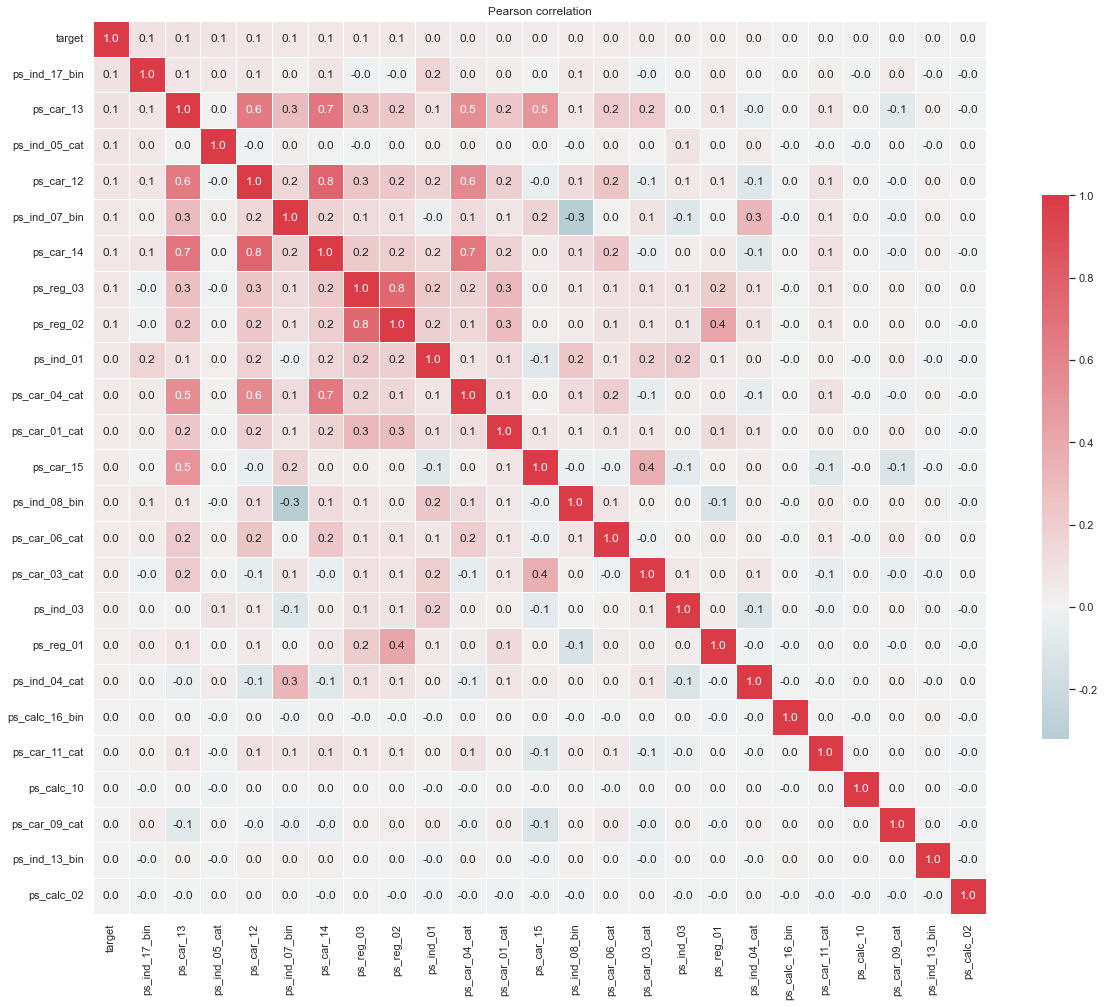

In [28]:
n=25
corr_col = train_balanced.replace({-1:np.nan}).dropna().corr().nlargest(n,'target')['target'].index
corr_matrix = np.corrcoef(train_balanced.replace({-1:np.nan}).dropna()[corr_col].values.T)
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap=cmap, vmax=1, center=0, fmt='.1f', annot=True, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .5},
           xticklabels=corr_col, yticklabels=corr_col)
plt.title('Pearson correlation')

从上图可以看出：
- 与计算相关的特征（calc）与其他所有列不存在线性相关关系
- 去掉所有-1值后，较强的线性相关主要存在于相似列名变量之间
    - ps_reg_02和ps_reg_03(0.8)
    - ps_car_14和ps_car_12(0.8)
    - ps_car_14和ps_car_13(0.7)
    - ps_car_14和ps_car_04_cat(0.7)
    - ps_car_12和ps_car_04_cat(0.6)
    - ps_car_12和ps_car_13(0.6)

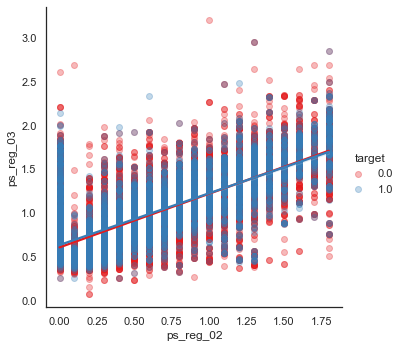

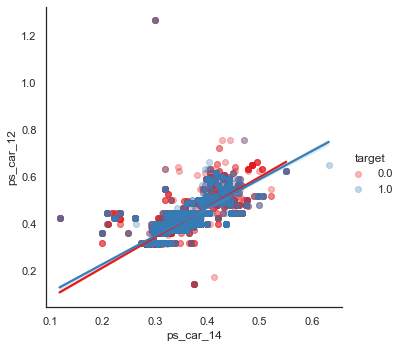

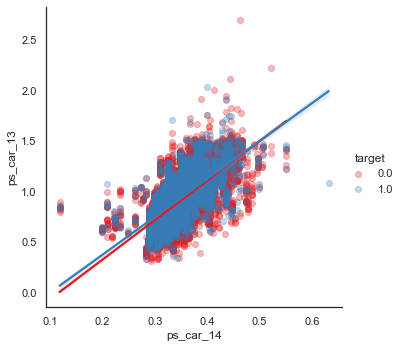

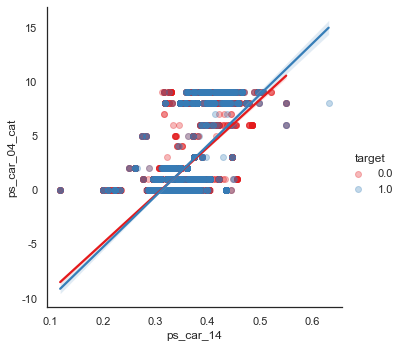

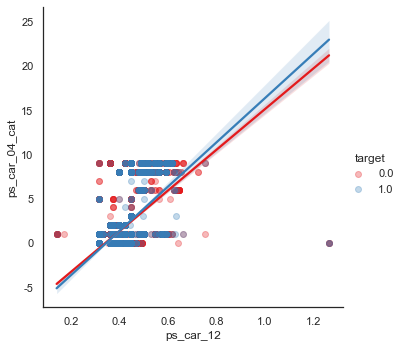

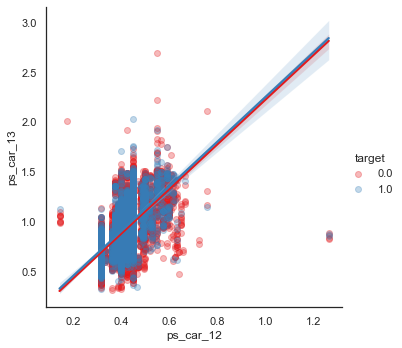

In [29]:
lmplot_col = [('ps_reg_02','ps_reg_03'),
              ('ps_car_14', 'ps_car_12'), 
              ('ps_car_14', 'ps_car_13'),
              ('ps_car_14', 'ps_car_04_cat'),
              ('ps_car_12', 'ps_car_04_cat'),
              ('ps_car_12', 'ps_car_13')]
for (a,b) in lmplot_col:
    sns.lmplot(x=a, y=b, data=train_balanced.replace({-1:np.nan}).dropna(), 
               hue='target', palette='Set1', scatter_kws={'alpha':0.3})

从上图可以看出，
- ps_reg_03的缺失值可以通过构建它和ps_reg_02线性模型填充
- ps_car_14的缺失值可以通过构建它和ps_car_13线性模型填充

#### 2.5.3 缺失值处理<a class='anchor' id = '2.5.3'></a>
[返回目录](#table)

In [30]:
#### 舍弃前两个缺失值超过40%的分类变量
cols_todrop = ['ps_car_03_cat', 'ps_car_05_cat']
meta.loc[cols_todrop, '是否保留'] = False

![](https://s6.jpg.cm/2022/02/26/LgNC44.png)

In [31]:
#### 对第三、四名连续型变量使用sklearn的Imputer缺失值填充
#### 先定义函数查看分布
#### 函数statDict: 返回三个值的字典
def statDict(data):
    #### -1 换成 缺失值
    data = data.replace(-1,np.nan)
    stat_dict = {
        '中位数': data.describe()['50%'],
        '平均值': data.describe()['mean'],
        '众数': data.value_counts(ascending = False).index[0]}
    return stat_dict

#### 函数sortStatDict: 返回排序好的list
def sortStatDict(a_dict):
    return sorted([(a,round(b,2)) for (a,b) in a_dict.items()], 
                  key=lambda x: x[1])

In [32]:
# 第三名ps_reg_03: 18.11%是缺失值
stat_reg03_before = statDict(train_balanced_update['ps_reg_03'])
sort_stat_reg03_before = sortStatDict(stat_reg03_before)
print(f'ps_reg_03填充之前：{sort_stat_reg03_before}')

ps_reg_03填充之前：[('众数', 0.63), ('中位数', 0.81), ('平均值', 0.9)]


可以看出分布呈左偏，填充众数

In [33]:
mode_imputer = SimpleImputer(missing_values = -1, 
                             strategy='most_frequent',
                             add_indicator=True) # 会在数据后面加入有0和1构成的数据，0表示所在位置非缺失值，1表示所在位置为缺失值
train_balanced_update['ps_reg_03']=[x[0] for x in mode_imputer.fit_transform(train_balanced_update[['ps_reg_03']]).tolist()]

In [34]:
stat_reg03_after = statDict(train_balanced_update['ps_reg_03'])
sort_stat_reg03_after = sortStatDict(stat_reg03_after)
print(f'ps_reg_03填充之后：{sort_stat_reg03_after}')

ps_reg_03填充之后：[('众数', 0.63), ('中位数', 0.73), ('平均值', 0.85)]


In [35]:
# ps_car_14: 7.16%是缺失值
stat_car14_before = statDict(train_balanced_update['ps_car_14'])
sort_stat_car14_before = sortStatDict(stat_car14_before)
print(f'ps_car_14填充之前：{sort_stat_car14_before}')

ps_car_14填充之前：[('众数', 0.36), ('中位数', 0.37), ('平均值', 0.37)]


可以看出分布接近正态分布，填充平均值

In [36]:
mean_imputer = SimpleImputer(missing_values = -1, 
                             strategy='mean',
                             add_indicator=True) # 会在数据后面加入有0和1构成的数据，0表示所在位置非缺失值，1表示所在位置为缺失值
train_balanced_update['ps_car_14']=[x[0] for x in mean_imputer.fit_transform(train_balanced_update[['ps_car_14']]).tolist()]

In [37]:
stat_car14_after = statDict(train_balanced_update['ps_car_14'])
sort_stat_car14_after = sortStatDict(stat_car14_after)
print(f'ps_car_14填充之后：{sort_stat_car14_after}')

ps_car_14填充之后：[('中位数', 0.37), ('平均值', 0.37), ('众数', 0.37)]


In [38]:
#### 最后两列，由于缺失值比较少，先查看balanced train有没有缺失值
miss_summary.iloc[11:,:]

,变量名称,变量类型,缺失值数量
11,ps_car_11,ordinal,5(0.0%)
12,ps_car_12,interval,1(0.0%)


In [39]:
#### ps_car_11列： 抽到5个缺失值中的一个
train_balanced_update[train_balanced_update['ps_car_11']==-1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
91020,567304,0,7,1,4,1,0,0,0,1,...,6,0,4,8,0,1,0,0,0,0


In [40]:
#### 对ps_car_11的缺失值填充众数
train_balanced_update['ps_car_11'] = [x[0] for x in mode_imputer.fit_transform(train_balanced_update[['ps_car_11']])]

In [41]:
#### ps_car_12列：没有抽到缺失值那一行，不用填充
train_balanced_update[train_balanced_update['ps_car_12']==-1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin


In [42]:
#### 第五-十一都是分类变量: 使用sklearn的Imputer缺失值填充
#### 先他们收集到一个list里
miss_cat_col = miss_summary.iloc[4:11]['变量名称'].tolist()
miss_cat_col

['ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_02_cat']

分类变量没有比较数值大小的意义，填充众数

In [43]:
miss_cat_col_impute = mode_imputer.fit_transform(train_balanced_update[miss_cat_col])
train_balanced_update[miss_cat_col] = pd.DataFrame(miss_cat_col_impute).iloc[:,:len(miss_cat_col)]
train_balanced_update[miss_cat_col] = train_balanced_update[miss_cat_col].astype('int64')

## 3. 探索性分析 <a class='anchor' id= '3'></a>
[返回目录](#table)

<Figure size 432x288 with 0 Axes>

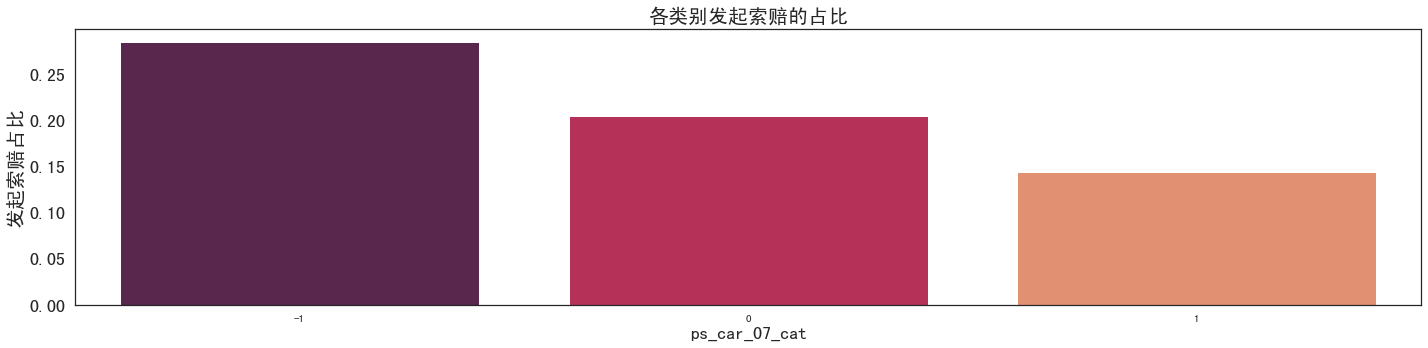

<Figure size 432x288 with 0 Axes>

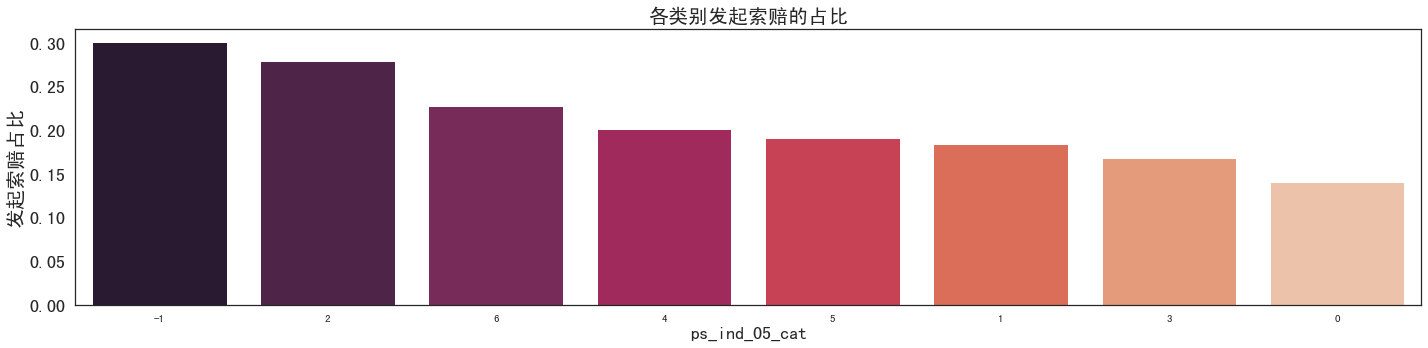

<Figure size 432x288 with 0 Axes>

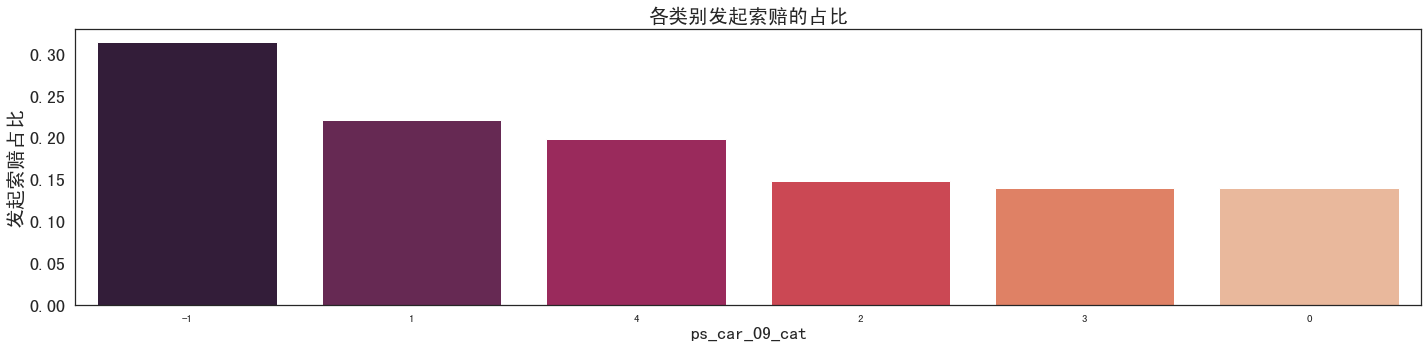

<Figure size 432x288 with 0 Axes>

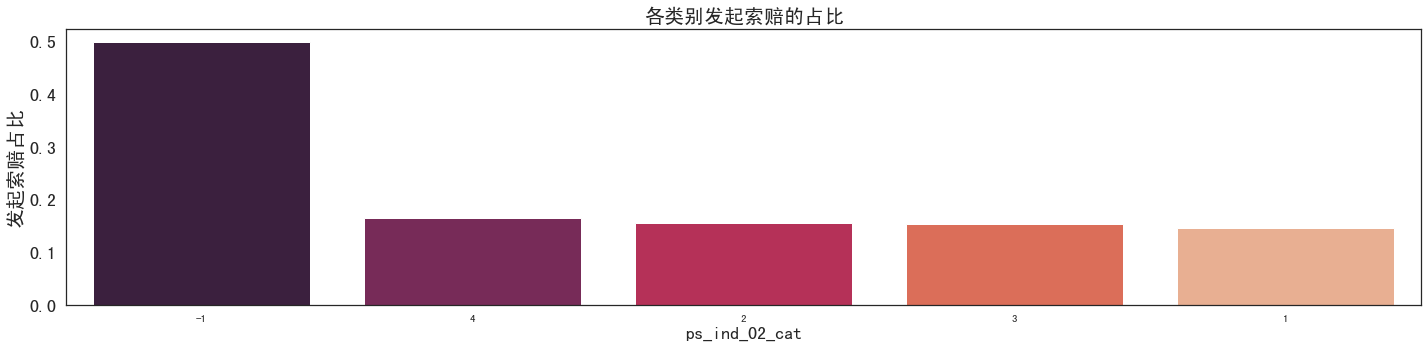

<Figure size 432x288 with 0 Axes>

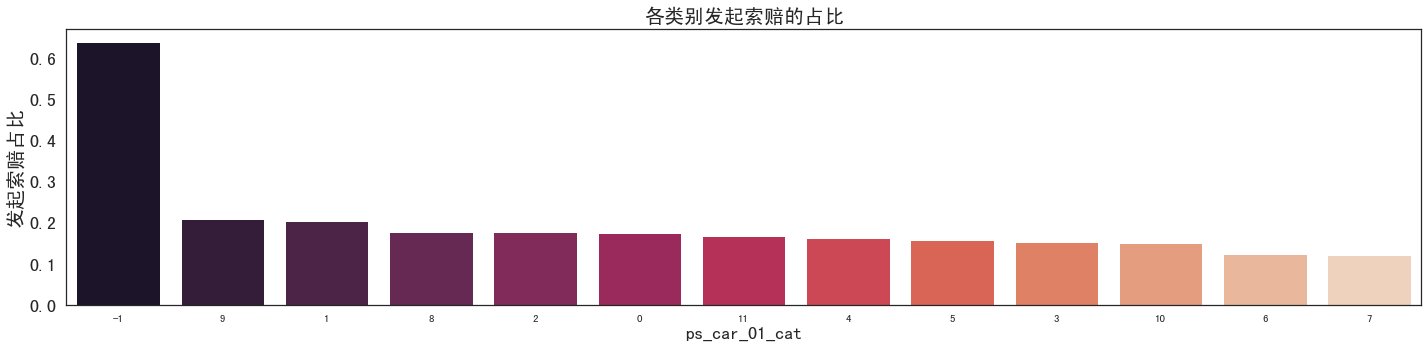

<Figure size 432x288 with 0 Axes>

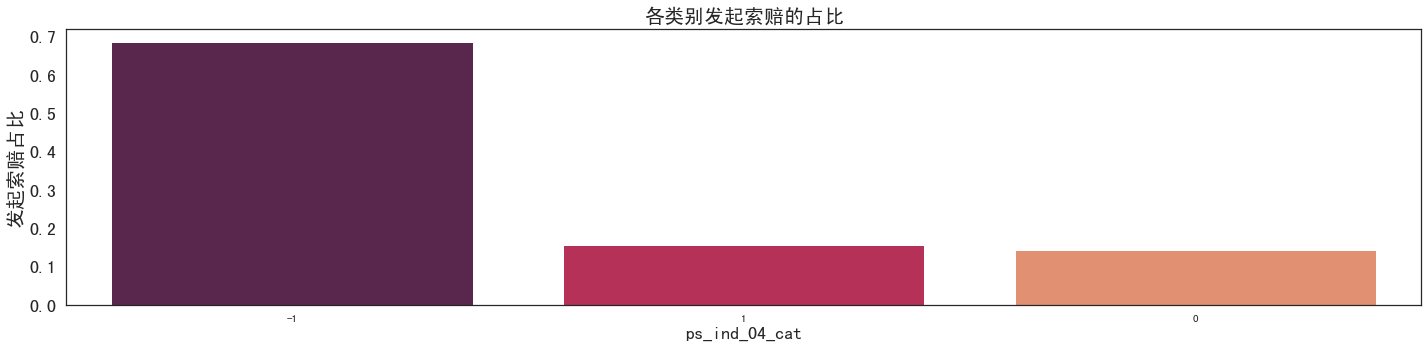

<Figure size 432x288 with 0 Axes>

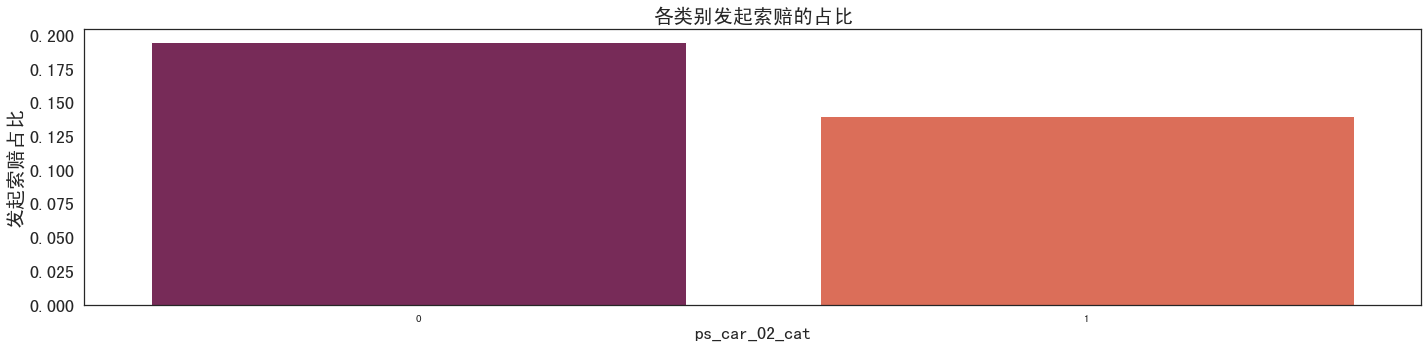

In [44]:
#### 格式设置
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

for col in miss_cat_col:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,5))

    cat_perc = train_balanced[[col, 'target']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette='rocket')
    plt.title(f'各类别发起索赔的占比', fontsize=20)
    
    plt.xlabel(col, fontsize=18)
    plt.ylabel('发起索赔占比', fontsize=20)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.show()

从上图可以看出
- 绝大多数缺失值对用户来年索赔（target=1）有较大的影响，有有用信息，
- 所以前六列缺失值不应该直接用众数填充, 而是把-1当成另外一个分类
- 最后一列由于缺失值比较少，可以保留填充的方法

In [45]:
#### 把impute的值reverse成原来的值
train_balanced_update[miss_cat_col[:6]]= pd.DataFrame(mode_imputer.inverse_transform(miss_cat_col_impute)).iloc[:,:6].astype('int64')

In [46]:
#### 定义函数更新meta表格
def metastat(raw_data, processed_data=None, cols_todrop = [], keep_missing = True):
    """
    raw_data: raw data obtained
    data_processed: data after preprocessing
    cols_to_drop: excluded cols that contain too many missing values or we dont use
    keep_missing: True if we find we dont need to eliminate missing values after imputation
    """
    data = []
    if processed_data is not None:
        df = processed_data.copy()
    else:
        df = raw_data
        
    for col in df.columns:
        # Defining the role
        if col == 'target':
            role = '目标标签（是否发起索赔）'
        elif col == 'id':
            role = '序列号（不属于特征）'
        else:
            role = '特征'

        # 加入ratio变量
        if 'bin' in col or col == 'target' or ':' in col:
            level = 'binary'
        elif 'cat' in col[-3:] or col == 'id':
            level = 'nominal'
        elif df[col].dtype == 'float64' and df[col].replace(-1,np.nan).max()-df[col].replace(-1,np.nan).min() > 1:
            level = 'interval'
        elif df[col].dtype == 'float64' and df[col].replace(-1,np.nan).max()-df[col].replace(-1,np.nan).min() <= 1:
            level = 'ratio'
        elif df[col].dtype == 'int64':
            level = 'ordinal'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id' or col in cols_todrop:
            keep = False

        # Defining the data type 
        dtype = df[col].dtype
        
        # 定义唯⼀值数量
        if col == 'id' or df[col].dtype == 'float64' or ':' in col :
            uniq = '不统计'
        else:
            if keep_missing == True:
                uniq = train[col].nunique()
            else:
                uniq = train[col].replace({-1:np.nan}).nunique()

        # 定义缺失值
        if (keep_missing) & (col in miss_cat_col):
            n_missing = 0  
        else:
            n_missing = sum(df[col] == -1)          
        missing = f'{n_missing}({round(n_missing*100/len(train),2)}%)'

        col_dict = {
            '变量名称': col,
            '数据角色': role,
            '变量类型': level,
            '数据类型': dtype,
            '是否保留': keep,
            '唯一值数量': uniq,
            '缺失值数量': missing
        }
        data.append(col_dict)
    
    data = pd.DataFrame(data, columns=list(col_dict.keys()))
    data.set_index('变量名称', inplace=True)
    
    missing_cols = [col for col in raw_data.columns if raw_data[col].min() == -1]
    data['缺失值处理'] = ['无缺失值' if col not in missing_cols
        else '已去除' if col in cols_todrop
        else '保留缺失值' if data.loc[col,'缺失值数量'][0] != '0' 
        else '已填充' for col in data.index]
    
    return data

In [47]:
final_meta = metastat(raw_data = train, 
                  processed_data = train_balanced_update, 
                  cols_todrop = cols_todrop, 
                  keep_missing = True)
final_meta

,数据角色,变量类型,数据类型,是否保留,唯一值数量,缺失值数量,缺失值处理
变量名称,,,,,,,
id,序列号（不属于特征）,nominal,int64,False,不统计,0(0.0%),无缺失值
target,目标标签（是否发起索赔）,binary,int64,True,2,0(0.0%),无缺失值
ps_ind_01,特征,ordinal,int64,True,8,0(0.0%),无缺失值
ps_ind_02_cat,特征,nominal,int64,True,5,0(0.0%),已填充
ps_ind_03,特征,ordinal,int64,True,12,0(0.0%),无缺失值
ps_ind_04_cat,特征,nominal,int64,True,3,0(0.0%),已填充
ps_ind_05_cat,特征,nominal,int64,True,8,0(0.0%),已填充
ps_ind_06_bin,特征,binary,int64,True,2,0(0.0%),无缺失值
ps_ind_07_bin,特征,binary,int64,True,2,0(0.0%),无缺失值


## 4. 特征工程 <a class='anchor' id= '4'></a>
### 4.1分类变量<a class='anchor' id= '4.1'></a>
[返回目录](#table)

In [48]:
#### 定义target encode的函数
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # 集散这一列关于target的group mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # 平滑
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # 计算所有target的mean
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    # 如果某一类别的值的个数特别多，比如104这一类就有21255行，那么我们就要削减其关于target的mean的权值。
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # 分别对train和test计算mean
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [49]:
#### 定义一个函数
#### 把类别数大于某值的列都通过target encoding处理
#### 把类别数小于/等于某值的列都通过get_dummies处理
def CatProcess(meta_data = final_meta.copy(), train_data =  train_balanced_update.copy(), test_data = test.copy(), 
               boundary = 5, onehot_coding = True, target_encode_plot=True):
    #### 筛选出分类变量
    meta_nominal = meta_data[(meta_data['是否保留']) &
                             (meta_data['变量类型']=='nominal')]
    
    ##### 进一步筛选出类别数大于boundary的列
    large_nominal_col = meta_nominal[meta_nominal['唯一值数量']>boundary].index
    print(f'分类数大于{boundary}的列：({len(large_nominal_col)})\n{large_nominal_col.tolist()}')
    ##### 对这些列进行target encoding
    for i in large_nominal_col:
        train_encoded, test_encoded = target_encode(
            train_data[i], 
            test_data[i], 
            target = train_data.target,
            min_samples_leaf = 100,
            smoothing = 10,
            noise_level = 0.01)
        ##### 新encode的列拼到输入的数据集（train、test）
        train_data[i+'_tar_enc'] = train_encoded.astype('float64')
        test_data[i+'_tar_enc'] = test_encoded.astype('float64')
        ##### 看encode之后的数值分布
        if target_encode_plot:
            sns.displot(train_encoded)
        ##### 原列名加到要drop的list里
        cols_todrop.append(i)
    ##### 新加的列的列名
    new_large_nominal_col = [j for j in train_data.columns if '_tar_enc' in j]
    print(f'target encoding新增的列：({len(new_large_nominal_col)})\n{new_large_nominal_col}')
   
    
    ##### 如果对剩下的column进行onehot encode
    if onehot_coding:
        ##### 筛选出类别数小于/等于boundary的列
        small_nominal_col = meta_nominal[meta_nominal['唯一值数量']<=boundary].index
        print(f'分类数小于/等于{boundary}的列：({len(small_nominal_col)})\n{small_nominal_col.tolist()}')
        
        ##### 新encode的列拼到输入的数据集（train、test）
        for i in small_nominal_col:
            train_data = pd.concat([
                train_data,
                pd.get_dummies(train_data[i], prefix = i, prefix_sep=":")]
                , axis=1)
            test_data = pd.concat([
                test_data,
                pd.get_dummies(test_data[i], prefix=i, prefix_sep=":")]
                , axis=1)
            ##### 原列名加到要drop的list里
            cols_todrop.append(i)
        
        ##### 新加的列的列名
        new_small_nominal_col = [j for j in train_data.columns if ':' in j]
        print(f'one-hot encoding新增的列：({len(new_small_nominal_col)})\n{new_small_nominal_col}')
        
    ##### 更新meta表
    meta_data = metastat(train_data, cols_todrop = cols_todrop)
    train_col = meta_data[meta_data['是否保留']].index.tolist()
    test_col = [x for x in train_col if x != 'target']
    return meta_data, train_data[train_col], test_data[test_col]

In [50]:
meta_encode, train_balanced_encode, test_encode = CatProcess(
    meta_data = final_meta.copy(), 
    train_data =  train_balanced_update.copy(), 
    test_data = test.copy(), 
    target_encode_plot=False, 
    boundary = 10, 
    onehot_coding = False)

分类数大于10的列：(3)
['ps_car_01_cat', 'ps_car_06_cat', 'ps_car_11_cat']
target encoding新增的列：(3)
['ps_car_01_cat_tar_enc', 'ps_car_06_cat_tar_enc', 'ps_car_11_cat_tar_enc']


### 4.2 连续变量<a class='anchor' id= '4.2'></a>
[返回目录](#table)

<AxesSubplot:>

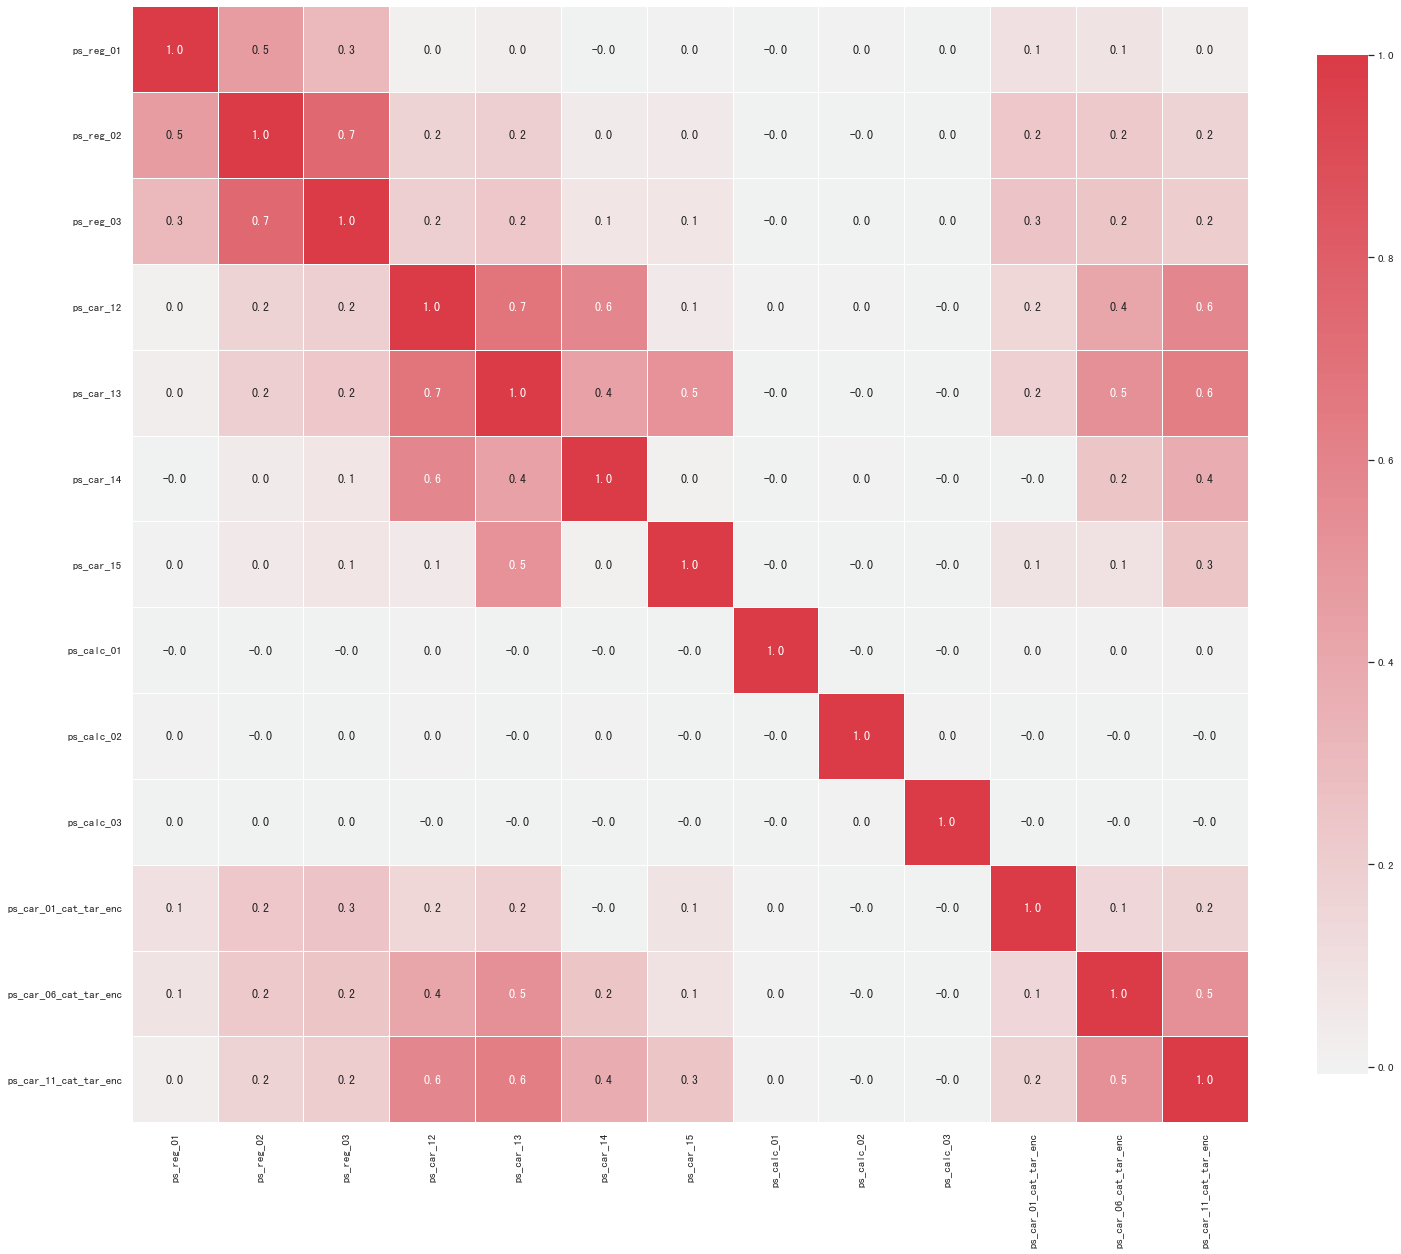

In [51]:
continuous_col = meta_encode[(meta_encode['变量类型'] == 'interval')| 
            (meta_encode['变量类型'] == 'ratio') & 
            (meta_encode['是否保留'])].index.tolist()
corr_matrix = np.corrcoef(train_balanced_encode[continuous_col].values.T) 
plt.figure(figsize=[25,25])
sns.heatmap(data = corr_matrix, vmax=1, center=0, cmap =cmap,
            fmt='.1f', annot=True,
            square=True, linewidths=0.5, cbar_kws={"shrink": .75},
            xticklabels=continuous_col, yticklabels=continuous_col)

可以看出，填充后的这些连续变量相关程度较高：
- ps_reg_02和ps_reg_03(0.7)
- ps_car_12和ps_car_13(0.7)、ps_car_14(0.6)
- ps_car_11_cat_tar_enc和ps_car_12(0.6)、ps_car_13(0.6)

不能把具有较强相关性的变量都带入模型中，因为相关特征不能提升模型表现，否则：
- 线性模型会出现多重共线性的问题，从而导致解析解的波动较大，方差较大，不稳定
- 树形模型会掩盖其中的交互性

### 4.2.1 特征分箱<a class='anchor' id= '4.2.1'></a>
[返回目录](#table)

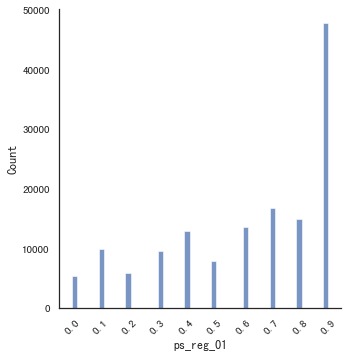

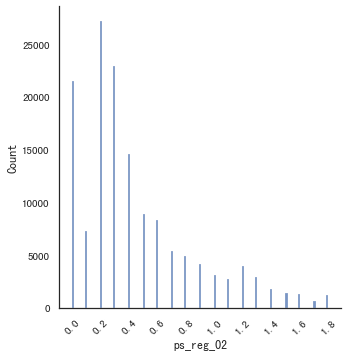

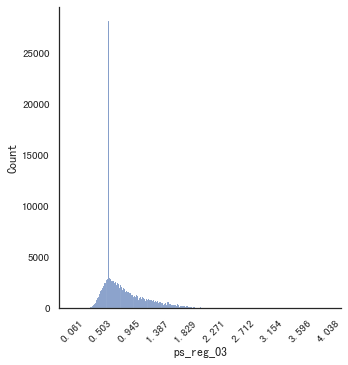

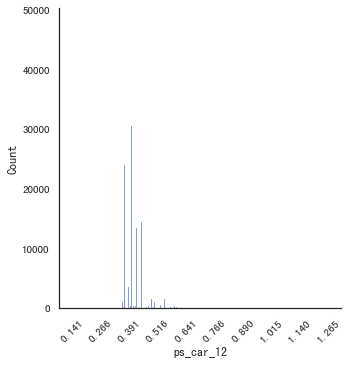

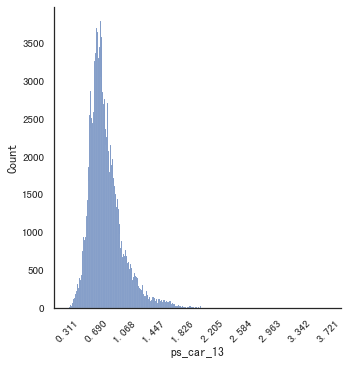

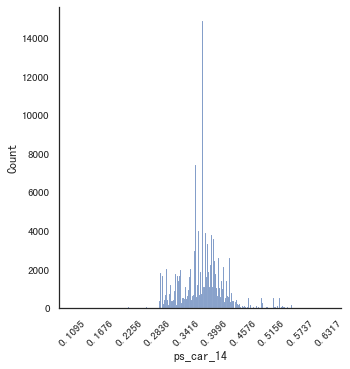

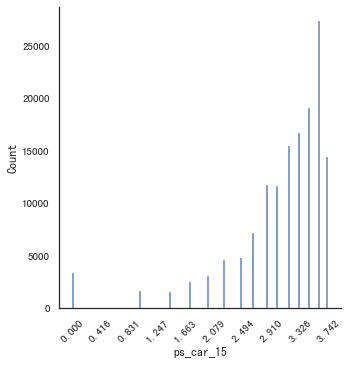

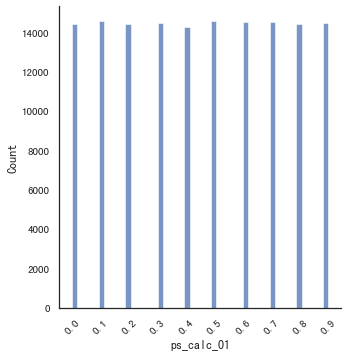

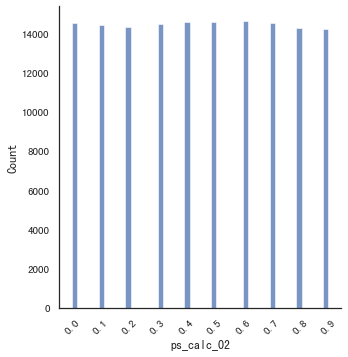

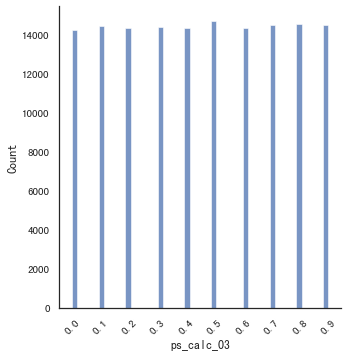

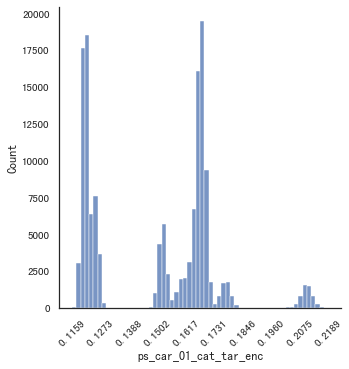

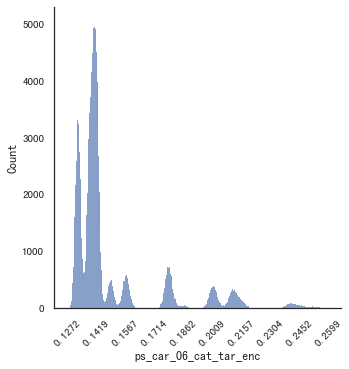

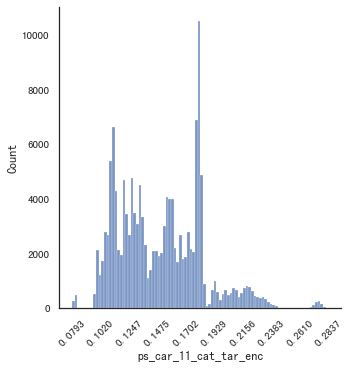

In [52]:
for col in continuous_col:
    sns.displot(train_balanced_encode[col])
    plt.xticks(ticks = np.linspace(start = train_balanced_encode[col].min(),
                                   stop = train_balanced_encode[col].max(),
                                   num = 10),rotation = 45)

从上图可以看出
- 有一些变量虽然是连续型的，但是并不是会形成传统意义上的概率分布，还会有离散型数据的性质出现，并且有很多尖峰的情况。
- 所以尝试采用特征离散化，来强化突出特征的关键性信息（主要集中在尖峰附近），并简化特征，避免过拟合。
- 同时避免丢失离群值（离群值无法定义为异常值，并不是分布的异常就说明其不合理性，在此没有更多的evidence证明，所以不剔除离群值）

In [53]:
def woe_iv_encoding(data, feat, target, max_intervals, verbose = False):
    
    feat_bins = pd.qcut(x = data[feat], q = max_intervals, duplicates='drop')
    gi = pd.crosstab(feat_bins,data[target])
    gb = pd.Series(data=data[target]).value_counts()

    bad = gi[1]/gi[0]
    good = gb[1]/gb[0]

    # 计算woe
    woe = np.log(bad) - np.log(good)

    # 计算iv
    iv = (bad-good)*woe

    # 计算整个特征的iv
    f_iv = iv.sum()  
    if verbose == True:
        print(f"根据当前的间隔数{max_intervals}，特征{feat}所计算的总information value为：{f_iv}")
        print('='*80)

    # 进行映射操作
    dic = iv.to_dict()

    iv_bins = feat_bins.map(dic)  # 连续型变量离散化

    return iv_bins.astype('float64')

In [ ]:
continuous_col_bin = ['ps_reg_01','ps_car_12','ps_car_13','ps_car_14']  

for col in continuous_col_bin:
    train_balanced_encode[f"{col}_bin_woe"] = woe_iv_encoding(data = train_balanced_encode, feat = col, target = 'target', max_intervals = 20)
    sns.displot(train_balanced_encode[f"{col}_bin_woe"])

### 4.2.2 特征交互<a class='anchor' id= '4.2.1'></a>
[返回目录](#table)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

interactions = pd.DataFrame(data=poly.fit_transform(train_balanced_encode[continuous_col]), 
                            columns=poly.get_feature_names_out(continuous_col))

interactions.drop(continuous_col, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('特征交互前，训练集有 {}个变量 '.format(train_balanced_encode.shape[1]))
train_balanced_encode = pd.concat([train_balanced_encode, interactions], axis=1)
print('特征交互后，训练集有 {}个变量'.format(train_balanced_encode.shape[1]))